In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [2]:
# Eugene's codes start here

In [3]:
# Eugene's codes end here

In [4]:
# Feipeng's codes start here

In [5]:
# Feipeng's codes end here

In [6]:
# Ricardo's codes start here

In [7]:
# Ricardo's codes end here

In [8]:
# Jenny's codes start here
vaccine_county = pd.read_csv("Clean_data/vaccine_us_county_clean.csv",low_memory=False)
# vaccine_county_sample = pd.read_csv("Clean_data/vaccine_county_sample.csv",low_memory=False)

In [21]:
vaccine_county_sample_rename = vaccine_county_sample.rename(columns={"Recip_County": "County", "Series_Complete_Pop_Pct": "Vaccination_Complete_Pct","Recip_State":"State"})

In [10]:
svi_df = pd.read_csv("Resource/04_siv_county.csv",low_memory=False)
svi_df_rename = svi_df.rename(columns={"FIPS Code": "FIPS", "County Name": "County"})

In [11]:
svi_df_rename['County'] = svi_df_rename['County'].str.split(',', expand=True)[0]
svi_df_rename.head()

,FIPS,County,State,Estimated hesitant,Estimated strongly hesitant,Social Vulnerability Index (SVI),SVI Category,CVAC level of concern for vaccination rollout,CVAC Level Of Concern,Percent adults fully vaccinated against COVID-19
0,1131,Wilcox County,ALABAMA,0.23,0.11,0.93,Very High Concern,0.94,Very High Concern,0.228
1,1129,Washington County,ALABAMA,0.23,0.11,0.73,High Concern,0.82,Very High Concern,0.192
2,1133,Winston County,ALABAMA,0.22,0.11,0.70,High Concern,0.80,High Concern,0.085
3,1127,Walker County,ALABAMA,0.23,0.11,0.75,High Concern,0.68,High Concern,0.158
4,2013,Aleutians East Borough,ALASKA,0.26,0.12,0.58,Moderate Concern,0.87,Very High Concern,0.195


In [22]:
vaccine_svi_df = pd.merge(vaccine_county_sample_rename, svi_df_rename, on='FIPS')
vaccine_svi_df = vaccine_svi_df[['Date','FIPS','County_x','State_x','Vaccination_Complete_Pct','Metro_status','Social Vulnerability Index (SVI)', 'SVI_CTGY','SVI Category']] 
vaccine_svi_df = vaccine_svi_df.rename(columns={"County_x": "County","State_x": "State"})
vaccine_svi_df.to_csv("vaccine_svi_df.csv", encoding="utf-8", index=False)

In [23]:
vaccine_svi_df

,Date,FIPS,County,State,Vaccination_Complete_Pct,Metro_status,Social Vulnerability Index (SVI),SVI_CTGY,SVI Category
0,09/30/2021,6021,Glenn County,CA,45.4,Non-metro,0.89,D,Very High Concern
1,09/30/2021,53051,Pend Oreille County,WA,34.2,Metro,0.54,C,Moderate Concern
2,09/30/2021,13111,Fannin County,GA,19.4,Non-metro,0.30,B,Low Concern
3,09/30/2021,47183,Weakley County,TN,31.7,Non-metro,0.66,C,High Concern
4,09/30/2021,30007,Broadwater County,MT,28.3,Non-metro,0.04,A,Very Low Concern
...,...,...,...,...,...,...,...,...,...
973,09/30/2021,27095,Mille Lacs County,MN,49.4,Metro,0.59,C,Moderate Concern
974,09/30/2021,8065,Lake County,CO,52.2,Non-metro,0.45,B,Moderate Concern
975,09/30/2021,21175,Morgan County,KY,42.1,Non-metro,0.83,D,Very High Concern
976,09/30/2021,51183,Sussex County,VA,33.1,Metro,0.91,D,Very High Concern


The r value is: -0.2186476302605177
The r-squared is: 0.04780678621854006


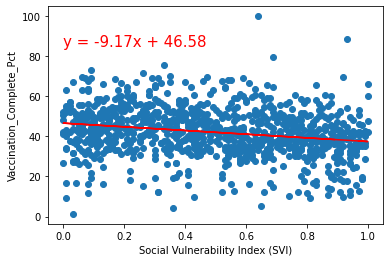

In [18]:
x_values = vaccine_svi_df['Social Vulnerability Index (SVI)']
y_values = vaccine_svi_df['Vaccination_Complete_Pct']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,85),fontsize=15,color="red")
plt.xlabel('Social Vulnerability Index (SVI)')
plt.ylabel('Vaccination_Complete_Pct')
print(f"The r value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
plt.show()


In [ ]:
#Anova Test

In [15]:
# Jenny's codes end here